Step 1 : Imports the data into a POstgreSQL database with adjustable spesifications. This can be efficiently imported using Spark.

In [1]:
import findspark
findspark.init('/opt/spark/')

In [2]:
import itertools
from datetime import datetime
from pyspark import StorageLevel
from pyspark.sql.types import StringType, IntegerType, DoubleType, DecimalType,LongType 
from pyspark.sql.types import StructType, StructField, DateType
from pyspark import SparkConf
from pyspark import SparkContext
from pyspark.sql import SQLContext, Row
from pyspark.sql.functions import col, udf, unix_timestamp, avg

In [3]:
sc = SparkContext(appName='Keberangkatan_delay')
sql_c = SQLContext(sc)

Step 2: To efficiently manage the data, the data types are defined. 

In [4]:
skema_pesawat = StructType([
    StructField("Year", IntegerType()),
    StructField("Quarter", IntegerType()),
    StructField("Month", IntegerType()),
    StructField("DayofMonth", IntegerType()),
    StructField("DayofWeek", IntegerType()),
    StructField("FlightDate", StringType()),
    StructField("UniqueCarrier", StringType()),
    StructField("AirlineID", LongType()),
    StructField("Carrier", StringType()),
    StructField("TailNum", StringType()),
    StructField("FlightNum", IntegerType()),
    StructField("OriginAirportID", IntegerType()),
    StructField("OriginAirportSeqID", IntegerType()),
    StructField("OriginCityMarketID", IntegerType()),
    StructField("Origin", StringType()),
    StructField("OriginCityName", StringType()),
    StructField("OriginState", StringType()),
    StructField("OriginStateFips", IntegerType()),
    StructField("OriginStateName", StringType()),
    StructField("OriginWac", IntegerType()),
    StructField("DestAirportID", IntegerType()),
    StructField("DestAirportSeqID", IntegerType()),
    StructField("DestCityMarketID", IntegerType()),
    StructField("Dest", StringType()),
    StructField("DestCityName", StringType()),
    StructField("DestState", StringType()),
    StructField("DestStateFips", IntegerType()),
    StructField("DestStateName", StringType()),
    StructField("DestWac", IntegerType()),
    StructField("CRSDepTime", StringType()),
    StructField("DepTime", StringType()),
    StructField("DepDelay", DoubleType()),
    StructField("DepDelayMinutes", DoubleType()),
    StructField("DepDel15", DoubleType()),
    StructField("DepartureDelayGroups", IntegerType()),
    StructField("DepTimeBlk", StringType()),
    StructField("TaxiOut", DoubleType()),
    StructField("WheelsOff", StringType()),
    StructField("WheelsOn", StringType()),
    StructField("TaxiIn", DoubleType()),
    StructField("CRSArrTime", StringType()),
    StructField("ArrTime", StringType()),
    StructField("ArrDelay", DoubleType()),
    StructField("ArrDelayMinutes", DoubleType()),
    StructField("ArrDel15", DoubleType()),
    StructField("ArrivalDelayGroups", IntegerType()),
    StructField("ArrTimeBlk", StringType()),
    StructField("Cancelled", DoubleType()),
    StructField("CancellationCode", StringType()),
    StructField("Diverted", DoubleType()),
    StructField("CRSElapsedTime", DoubleType()),
    StructField("ActualElapsedTime", DoubleType()),
    StructField("AirTime", DoubleType()),
    StructField("Flights", DoubleType()),
    StructField("Distance", DoubleType()),
    StructField("DistanceGroup", IntegerType()),
    StructField("CarrierDelay", DoubleType()),
    StructField("WeatherDelay", DoubleType()),
    StructField("NASDelay", DoubleType()),
    StructField("SecurityDelay", DoubleType()),
    StructField("LateAircraftDelay", DoubleType()),
    StructField("FirstDepTime", StringType()),
    StructField("TotalAddGTime", StringType()),
    StructField("LongestAddGTime", StringType()),
    StructField("DivAirportLandings", StringType()),
    StructField("DivReachedDest", StringType()),
    StructField("DivActualElapsedTime", StringType()),
    StructField("DivArrDelay", StringType()),
    StructField("DivDistance", StringType()),
    StructField("Div1Airport", StringType()),
    StructField("Div1AirportID", StringType()),
    StructField("Div1AirportSeqID", StringType()),
    StructField("Div1WheelsOn", StringType()),
    StructField("Div1TotalGTime", StringType()),
    StructField("Div1LongestGTime", StringType()),
    StructField("Div1WheelsOff", StringType()),
    StructField("Div1TailNum", StringType()),
    StructField("Div2Airport", StringType()),
    StructField("Div2AirportID", StringType()),
    StructField("Div2AirportSeqID", StringType()),
    StructField("Div2WheelsOn", StringType()),
    StructField("Div2TotalGTime", StringType()),
    StructField("Div2LongestGTime", StringType()),
    StructField("Div2WheelsOff", StringType()),
    StructField("Div2TailNum", StringType()),
    StructField("Div3Airport", StringType()),
    StructField("Div3AirportID", StringType()),
    StructField("Div3AirportSeqID", StringType()),
    StructField("Div3WheelsOn", StringType()),
    StructField("Div3TotalGTime", StringType()),
    StructField("Div3LongestGTime", StringType()),
    StructField("Div3WheelsOff", StringType()),
    StructField("Div3TailNum", StringType()),
    StructField("Div4Airport", StringType()),
    StructField("Div4AirportID", StringType()),
    StructField("Div4AirportSeqID", StringType()),
    StructField("Div4WheelsOn", StringType()),
    StructField("Div4TotalGTime", StringType()),
    StructField("Div4LongestGTime", StringType()),
    StructField("Div4WheelsOff", StringType()),
    StructField("Div4TailNum", StringType()),
    StructField("Div5Airport", StringType()),
    StructField("Div5AirportID", StringType()),
    StructField("Div5AirportSeqID", StringType()),
    StructField("Div5WheelsOn", StringType()),
    StructField("Div5TotalGTime", StringType()),
    StructField("Div5LongestGTime", StringType()),
    StructField("Div5WheelsOff", StringType()),
    StructField("Div5TailNum", StringType())
])

The monthly raw-downloaded data of 2016 were collected and will be tranformed later into hdfs files.

In [5]:
list_tahun = ['2016']
list_bulan = ['1','2','3','4','5','6','7','8','9','10','11','12']

total_data = {}

#Collecting datas from 12 csv files
print('mengumpulkan data ... ')
for (tahun_str, bulan_str) in list (itertools.product(list_tahun, list_bulan)):
    tah_bul_str = '%s_%s'%(tahun_str, bulan_str)
    print('%s, '%(tah_bul_str), end="")
    total_data[tah_bul_str] = sql_c.read.csv(
    '/Users/wildanabdussalam/Documents/Code/datascience/dep_delay_san_2016/On_Time_On_Time_Performance_%s.csv'%(tah_bul_str),
    header=True,
    schema=skema_pesawat,
    escape='"'
    )
print('selesei')

mengumpulkan data ... 
2016_1, 2016_2, 2016_3, 2016_4, 2016_5, 2016_6, 2016_7, 2016_8, 2016_9, 2016_10, 2016_11, 2016_12, selesei


The aformentioned collected data still contained unnecessary data. The following scripts were aimed to filter it such that the meaningful informations were obtained. 

In [6]:
ubketanggal = udf(lambda x: datetime.strptime(x, '%Y-%m-%d'), DateType())

bag_dat_penerbangan = []

print('Memproses', end="")
for tah_bul_str, ter_dat in total_data.items():
    print('%s, ' %(tah_bul_str), end="")
    dat_penerbangan = ter_dat.select(
    "Year","Quarter","Month","DayofMonth","DayOfWeek","FlightDate","UniqueCarrier","AirlineID",
    "Carrier","TailNum","FlightNum","OriginAirportID","OriginAirportSeqID","OriginCityMarketID",
    "Origin","OriginCityName","OriginState","OriginStateFips","OriginStateName","OriginWac",
    "DestAirportID","DestAirportSeqID","DestCityMarketID","Dest","DestCityName","DestState",
    "DestStateFips","DestStateName","DestWac","CRSDepTime","DepTime","DepDelay","DepDelayMinutes",
    "DepDel15","DepartureDelayGroups","DepTimeBlk","TaxiOut","WheelsOff","WheelsOn","TaxiIn","CRSArrTime",
    "ArrTime","ArrDelay","ArrDelayMinutes","ArrDel15","ArrivalDelayGroups","ArrTimeBlk","Cancelled",
    "CancellationCode","Diverted","CRSElapsedTime","ActualElapsedTime","AirTime","Flights","Distance",
    "DistanceGroup","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"
    ).withColumn(
        'FlightDate', ubketanggal(col('FlightDate'))
    )
    bag_dat_penerbangan.append(dat_penerbangan)
    
print('Selesei')

Memproses2016_1, 2016_2, 2016_3, 2016_4, 2016_5, 2016_6, 2016_7, 2016_8, 2016_9, 2016_10, 2016_11, 2016_12, Selesei


The data were eventually saved in hdfs-type (parquette) files. There were several advantages of this technique:
1. The downloaded data could be easily extended to bigger size of data. For example, with this script one can download the data prior to 1990. 
2. Since the data were saved to separated files, this enabled parallel-complex data processing which could be efficiently solved using Hadoop.
3. Should we need to show insitu big data visualisation, hdfs could be integrated easily with opensource projects such as https://openpmd-api.readthedocs.io as well as https://yt-project.org/.

In [7]:
data_master = bag_dat_penerbangan[0]

print('satukan data, ', end="")
for i in range(1,len(bag_dat_penerbangan)):
    print('%d, '%(i), end="")
    data_master = data_master.union(bag_dat_penerbangan[i])
print(" Selesei!")

print('Mulai export to HDFS...')
data_master.write.partitionBy(
        "Year","Month"
    ).parquet(
        '/Users/wildanabdussalam/Documents/Code/datascience/airline_data',
        mode='overwrite'
    )
print('Selesei!')

satukan data, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,  Selesei!
Mulai export to HDFS...
Selesei!


After saving into parquette files, the data can be served as meaningful datasets. Afterthat, pandas can be used to efficiently explore the informations within the data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
data_penerbangan = sql_c.read.parquet('airline_data')

In order to obtain more meaningful informations that aformentioned data, the data were filtered again such that we can extend it later to train and test the model. The following columns were chosen to gain some informations associated with the departure delays of airlines from the San Francisco airport. 

In [173]:
def tahbulstr(tahun, bulan):
    return '%d-%02d'%(tahun, bulan)


udftahbulstr = udf(tahbulstr, StringType())

delay_maskapai = data_penerbangan.select(
    'Year',
    'Month',
    'DayofWeek',
    'DayofMonth',
    'Carrier',
    'TailNum',
    'FlightNum',
    'Origin',
    'Dest',
    'DepTime',
    'DepDelayMinutes',
    'DepDel15',
    'TaxiOut',
    'Distance',
    'ArrDelayMinutes'
).filter(
#     (col('Origin').isin('SFO')) & (col('DepDelayMinutes') > 0) 
    col('Origin').isin('SFO')
)

In [174]:
delay_maskapai_pd = delay_maskapai.toPandas()

After filtering, we therefore can gain some informations by setting questions. For example, how many Airlines fly from San Francisco in 2016?

In [152]:
len(delay_maskapai_pd.Carrier.unique())

10

There were 10 flight carriers from San Francico in 2016.

How many unique airplanes flying from San Francisco in 2016? [note that according to USA, the flight delays were counted for delays more than 15 minutes. Therefore, we created another filtered data which contained all delayed flights more than 15 minutes]

In [153]:
ave_delay = delay_maskapai_pd[(delay_maskapai_pd.DepDelayMinutes > 15)]
len(ave_delay.TailNum.unique())

3236

How many destinations from San francisco in 2016?

In [154]:
san_connection = delay_maskapai_pd[(delay_maskapai_pd.Origin=='SFO')]
datagrup = san_connection.groupby([san_connection.Dest]).size()
print(len(datagrup))


81


What and when was the maximum departure delay in 2016? 

In [155]:
print(max(ave_delay.DepDelayMinutes))

2149.0


In [156]:
print(ave_delay.DayofMonth[max(ave_delay.DepDelayMinutes)],ave_delay.Month[max(ave_delay.DepDelayMinutes)])

22 8


The maximum departure delay occured on 22/8/2016 which took about 35 hours.

Were there seasonal traffic from San Francisco airport?

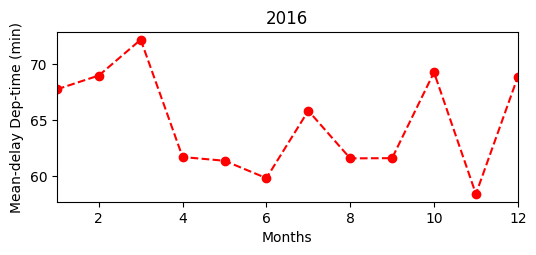

In [41]:

datagrup = pd.DataFrame(ave_delay.groupby([ave_delay.Month])['DepDelayMinutes'].mean().reset_index(name='Mean_Delay_Departure'))
# print(datagrup)

width = 5.487
height = width / 2.618

plt.close('all')
#Plotting Mean Departure delay over a Day
fig, axarr = plt.subplots(1, figsize=(6,3), dpi=100, sharex=False, sharey=False)
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

axarr.plot(datagrup.Month, datagrup.Mean_Delay_Departure,'ro--')
axarr.set_xlim(1, 12)
axarr.set_ylabel('Mean-delay Dep-time (min)')
axarr.set_xlabel('Months')
axarr.set_title('2016')

fig.set_size_inches(width, height)
fig.savefig("/Users/wildanabdussalam/Documents/Code/datascience/mean_dep_del_monthly.png",
           bbox_inches="tight", dpi=200)
plt.show()
plt.clf()


High-mean delay of departure occurs in March, October and December.

There are more to be explored from the figure above. An example of question of interest is the factors that determined the high-mean delay of departure in March, October, and December. However, these analysis require another data such as weather forecast. Therefore, another aspect of data is studied. The following figure shows airlines performance which departed from the San Francisco airport.

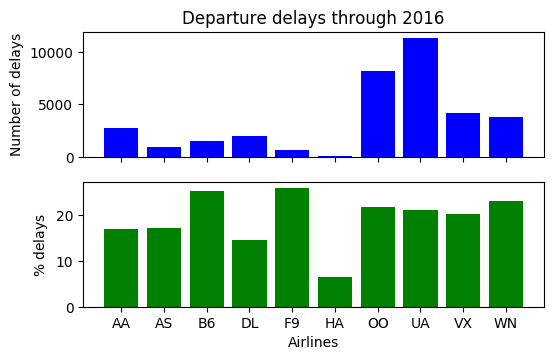

In [38]:
#Grouping by carrier and getting the count
grup_mask_filt = ave_delay.groupby([ave_delay.Carrier]).size().reset_index(name='Size')
# grup_mask_filt

#Fitering dataset for all flights
# pen_filt_mask_tot = delay_maskapai_pd[(delay_maskapai_pd.DepDelayMinutes >-15)]
grup_mask_filt_tot = delay_maskapai_pd.groupby([delay_maskapai_pd.Carrier]).size().reset_index(name='Size_tot')

#Merging column
col_gabung = pd.merge(grup_mask_filt,grup_mask_filt_tot, on=['Carrier'])

# CalculatingPercentage delays
col_gabung["Per_Delay"] = (col_gabung.Size/col_gabung.Size_tot)*100

width = 5.487
height = width / 1.618

plt.close('all')
fig, axarr = plt.subplots(2, figsize=(10,8), dpi=100, sharex=True, sharey=False)
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)


#Plotting Delay > 15 by Carrier through 2016
axarr[0].bar(grup_mask_filt['Carrier'], grup_mask_filt['Size'], color="blue")
axarr[0].set_ylabel('Number of delays')

#Plotting percentage delay > 15 to delay > 0 minutes
axarr[1].bar(col_gabung['Carrier'], col_gabung['Per_Delay'], color="green")
axarr[1].set_ylabel(r'$\%$ delays')
axarr[1].set_xlabel('Airlines')
axarr[0].set_title('Departure delays through 2016')

fig.set_size_inches(width, height)
fig.savefig("/Users/wildanabdussalam/Documents/Code/datascience/maskap_dep_delay.png",
           bbox_inches="tight", dpi=200)
plt.show()
plt.clf()



Fig. above shows the departure delays of airlines from San Francisco in 2016. The top figure shows the frequent number of delays against various types of carriers. The bottom one shows the percentage delays against various types of carriers. The percentage delays were defined as a ratio of 15 minutes departure delays to all departures of flights. The carrier codes can be found in the following link https://www.tvlon.com/resources/airlinecodes.htm. 

As shown in the top figure, United airline was the most departed-delay airline in through 2016 followed by Skywest and Virgin america airlines, respectively. This, however, unlikely to lead to the conclusion that the United airlines was the worst performance airlines through 2016. The United airlines conducted quite frequent flights in 2016 which label them as one of busiest airline in USA. The bottom figure shows inspite of the highest number of delays, the american airlines were not the worst performance airlines through 2016. Frontier airlines, however, placed a highest rank as the worst performance due to their less frequent flights. The best performance airlines were granted to Hawaian airlines followed by Delta airforce as well as American airlines. This is due to the fact that these airline conducted less frequent flights than the aformentioned cases. 

In addition to aforementioned decscriptions, as the departure delay were usually confirmed for delays more than 15 minutes, the DepDelayMinutes column which consist of boolean could be served as an classification information such that one can predict the flight delay. This could pave the way to understand factors that determine the departure delays at the san francisco airport. Therefore, nine variables were considered to construct a predictor of the binary delay variable.  

In [472]:
def tahbulstr(tahun, bulan):
    return '%d-%02d'%(tahun, bulan)


udftahbulstr = udf(tahbulstr, StringType())

delay_maskapai_filt = data_penerbangan.select(
    'Month',
    'DayofWeek',
    'DayofMonth',
    'Carrier',
    'Dest',
    'DepTime',
    'TaxiOut',
    'Distance',
    'DepDel15',
).filter(
#     (col('Origin').isin('SFO')) & (col('DepDelayMinutes') > 0) 
    col('Origin').isin('SFO')
)

In [473]:
delay_maskapai_filt_pd = delay_maskapai_filt.toPandas()
delay_maskapai_filt_pd_onan = delay_maskapai_filt_pd.dropna(axis='rows')
delay_maskapai_filt_pd_onan['Carrier'] = pd.factorize(delay_maskapai_filt_pd_onan['Carrier'])[0]
delay_maskapai_filt_pd_onan['Dest'] = pd.factorize(delay_maskapai_filt_pd_onan['Dest'])[0] 
delay_maskapai_filt_pd_onan['DepTime'] = pd.factorize(delay_maskapai_filt_pd_onan['DepTime'])[0] 
datcom_l = delay_maskapai_filt_pd_onan[(delay_maskapai_filt_pd_onan.DepDel15==1)]
datcom_nl = delay_maskapai_filt_pd_onan[(delay_maskapai_filt_pd_onan.DepDel15==0)]
print(len(datcom_l), len(datcom_nl))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


36445 133485


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


/Users/wildanabdussalam/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/wildanabdussalam/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/wildanabdussalam/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


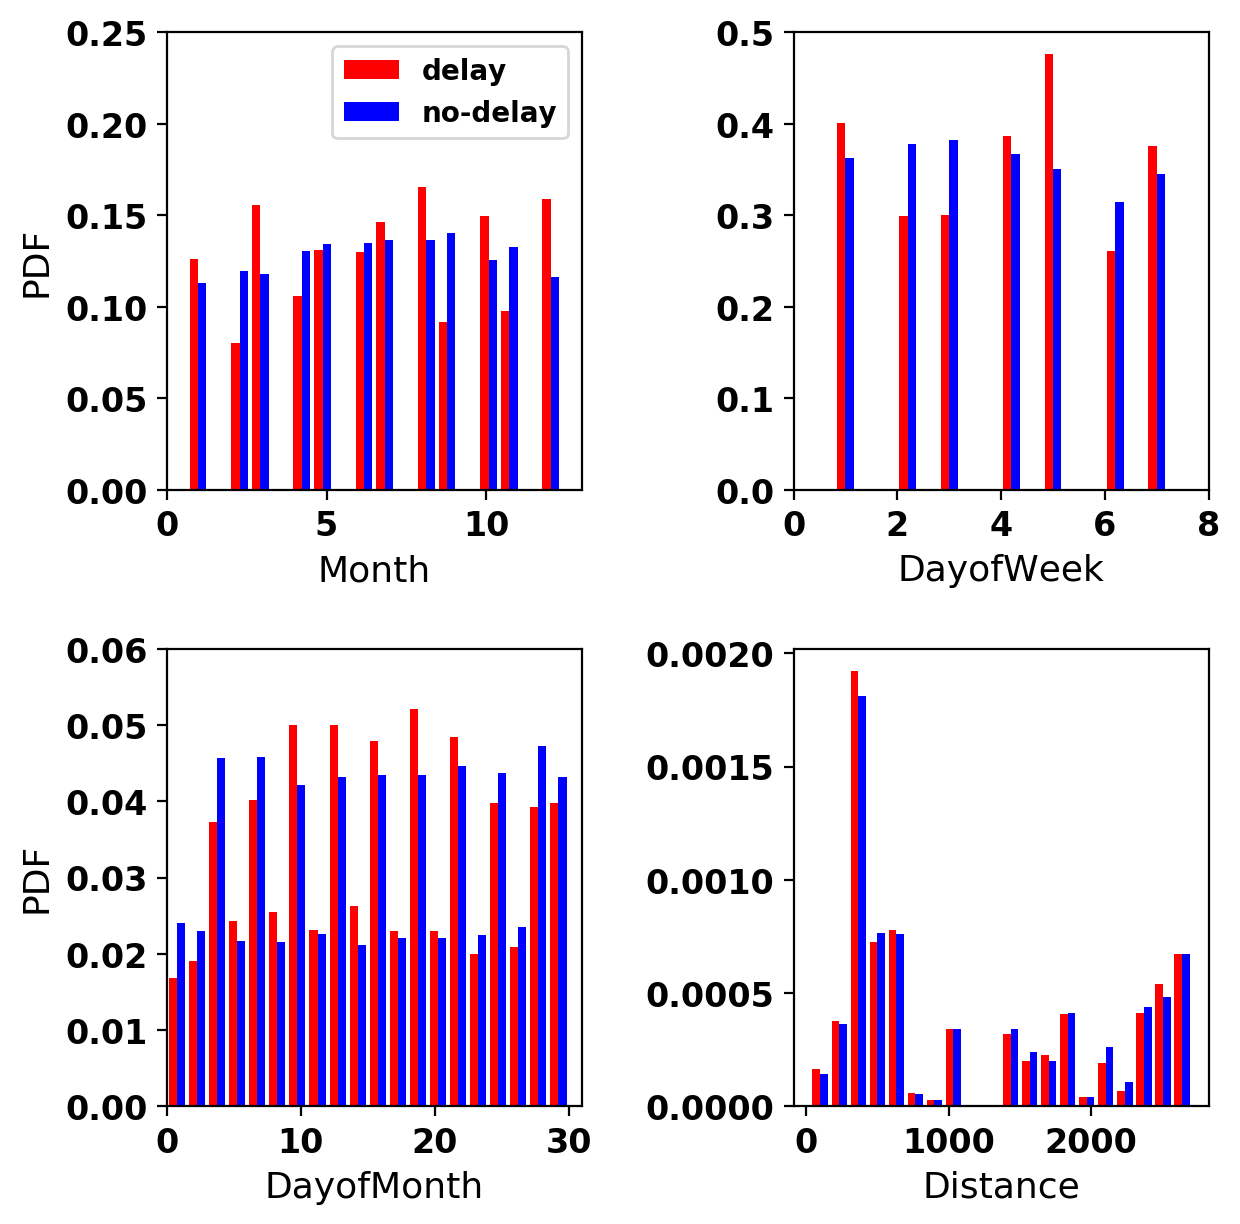

In [295]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 13}	
plt.rc('font', **font)

plt.axhline(linewidth=8) 
plt.axvline(linewidth=8) 

width = 6.487
height = width / 1.018

plt.close('all')
#Plotting Mean Departure delay over a Day
fig, axarr = plt.subplots(2,2, figsize=(6,6), dpi=200,  sharex=False, sharey=False)
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)
colors = ['red', 'blue']
labels = ['delay', 'no-delay']

axarr[0,0].hist([datcom_l.iloc[:,0],datcom_nl.iloc[:,0]], color=colors, 
           label=labels,bins=20, range=[0,13], histtype="bar", normed=True)
axarr[0,0].legend(prop={'size': 10}, loc=1)
axarr[0,0].set_xlim(0, 13)
axarr[0,0].set_ylim(0, 0.25)
axarr[0,0].set_xlabel('Month')
axarr[0,0].set_ylabel('PDF')


axarr[0,1].hist([datcom_l.iloc[:,1],datcom_nl.iloc[:,1]], color=colors, 
           label=labels,bins=20, range=[0,8], histtype="bar", normed=True)
axarr[0,1].set_xlim(0, 8)
axarr[0,1].set_ylim(0, 0.5)
axarr[0,1].set_xlabel('DayofWeek')


axarr[1,0].hist([datcom_l.iloc[:,2],datcom_nl.iloc[:,2]], color=colors, 
           label=labels,bins=20, range=[0,30], histtype="bar", normed=True)
axarr[1,0].set_xlim(0, 31)
axarr[1,0].set_ylim(0, 0.06)
axarr[1,0].set_xlabel('DayofMonth')
axarr[1,0].set_ylabel('PDF')

axarr[1,1].hist([datcom_l.iloc[:,7],datcom_nl.iloc[:,7]], color=colors, 
           label=labels,bins=20, histtype="bar", normed=True)
axarr[1,1].set_xlabel('Distance')


plt.tight_layout()
fig.set_size_inches(width, height)
fig.savefig("/Users/wildanabdussalam/Documents/Code/datascience/histo_ales.png",
           bbox_inches="tight", dpi=200)
plt.show()
plt.clf()

To gain some insights into features, normalized distributions for the 'delay' and 'non-delay' cases as the function of various features were plotted. Fig above shows 4 examples of normalized distributions for the 'delay' and 'non-delay' cases as the function of four features. Panels shows the probability density functions through (a) the months, (b) the days of week, (c) the days of month and (d) distances. As shown in Fig. (a), the delays frequently occured in March and December. Note that in contradiction to the Fig. 1 where the average of more than 15 minutes delays are considered, the distribution data provides the most frequent delay in August that relates to the end of summer vacations. Moreover, the departure delays frequently occured on Friday (see Fig. (b) and (c)) that was associated with weekly-short day-off. As the distances taken by the flight prone to departure delays were less than 1000 KM (see Fig. (d)), this shows that most of passenger travelled from San Francisco to other destinations for visiting their relatives, returning back from work, or having a short-vacation break. 

In [399]:
from collections import Counter
#minimum discrepancy function
def min_discrepancy(x,y):
    assert len(x)==len(y)
    
    xiny = False
    yinx = False    
    jumx = np.sum(x)
    jumy = np.sum(y)
    for (nilx,lily) in zip(x,y):
        if nilx>0 and lily==0:
            yinx = True
        if nilx==0 and lily>0:
            xiny = True
    if xiny and yinx:         # x and y supports not nested
        return float("inf")
    elif xiny:                # x support nested in y support
        pval1  = 0.0
        for (nilx,lily) in zip(x,y):
            if nilx>0 and lily>0:
                pval1 += (float(nilx)/jumx) * np.log((float(nilx)/jumx)/(float(lily)/jumy))
        return pval1
    elif yinx:                # y support nested in x support
        pval2  = 0.0
        for (nilx,lily) in zip(x,y):
            if nilx>0 and lily>0:
                pval2 += (float(lily)/jumy) * np.log((float(lily)/jumy)/(float(nilx)/jumx))
        return pval2
    else:                     # x and y supports identical
        pval1  = 0.0
        pval2  = 0.0
        for (nilx,lily) in zip(x,y):
            if (nilx>0) and (lily>0):
                pval1 += (float(nilx)/jumx) * np.log((float(nilx)/jumx)/(float(lily)/jumy))
                pval2 += (float(lily)/jumy) * np.log((float(lily)/jumy)/(float(nilx)/jumx))
        return min(pval1,pval2)

In [466]:
discr = {}
bin_ujung = np.linspace(min(datcom_l['Month']), max(datcom_l['Month']), 20)
p1, bin_ujung1 = np.histogram(datcom_l.Month, bins=bin_ujung, density=False)
p2, bin_ujung2 = np.histogram(datcom_nl.Month, bins=bin_ujung, density=False)
discr["Month"] = min_discrepancy(p1,p2)
bin_ujung = np.linspace(min(datcom_l['DayofMonth']), max(datcom_l['DayofMonth']), 20)
p1, bin_ujung1 = np.histogram(datcom_l.DayofMonth, bins=bin_ujung, density=False)
p2, bin_ujung2 = np.histogram(datcom_nl.DayofMonth, bins=bin_ujung, density=False)
discr["DayofMonth"] = min_discrepancy(p1,p2)
bin_ujung = np.linspace(min(datcom_l['DayofWeek']), max(datcom_l['DayofWeek']), 20)
p1, bin_ujung1 = np.histogram(datcom_l.DayofWeek, bins=bin_ujung, density=False)
p2, bin_ujung2 = np.histogram(datcom_nl.DayofWeek, bins=bin_ujung, density=False)
discr["DayofWeek"] = min_discrepancy(p1,p2)
bin_ujung = np.linspace(min(datcom_l['Carrier']), max(datcom_l['Carrier']), 20)
p1, bin_ujung1 = np.histogram(datcom_l.Carrier, bins=bin_ujung, density=False)
p2, bin_ujung2 = np.histogram(datcom_nl.Carrier, bins=bin_ujung, density=False)
discr["Carrier"] = min_discrepancy(p1,p2)
bin_ujung = np.linspace(min(datcom_l['Dest']), max(datcom_l['Dest']), 20)
p1, bin_ujung1 = np.histogram(datcom_l.Dest, bins=bin_ujung, density=False)
p2, bin_ujung2 = np.histogram(datcom_nl.Dest, bins=bin_ujung, density=False)
discr["Dest"] = min_discrepancy(p1,p2)
bin_ujung = np.linspace(min(datcom_l['DepTime']), max(datcom_l['DepTime']), 20)
p1, bin_ujung1 = np.histogram(datcom_l.DepTime, bins=bin_ujung, density=False)
p2, bin_ujung2 = np.histogram(datcom_nl.DepTime, bins=bin_ujung, density=False)
discr["DepTime"] = min_discrepancy(p1,p2)
bin_ujung = np.linspace(min(datcom_l['TaxiOut']), max(datcom_l['TaxiOut']), 20)
p1, bin_ujung1 = np.histogram(datcom_l.TaxiOut, bins=bin_ujung, density=False)
p2, bin_ujung2 = np.histogram(datcom_nl.TaxiOut, bins=bin_ujung, density=False)
discr["TaxiOut"] = min_discrepancy(p1,p2)
bin_ujung = np.linspace(min(datcom_l['Distance']), max(datcom_l['Distance']), 20)
p1, bin_ujung1 = np.histogram(datcom_l.Distance, bins=bin_ujung, density=False)
p2, bin_ujung2 = np.histogram(datcom_nl.Distance, bins=bin_ujung, density=False)
discr["Distance"] = min_discrepancy(p1,p2)


# Now do the dummy variables, starting at column 7 to skip the 6 columns we already did, 
# plus the response column "dep_delayed_15min".
bin_ujungs   = np.linspace(-0.5, 1.5, 3)
for ngaran in list(delay_maskapai_filt_pd_onan.columns.values):
    p1,bin_ujungs1 = np.histogram(datcom_l[ngaran], bins=bin_ujungs, density=False)
    p2,bin_ujungs2 = np.histogram(datcom_nl[ngaran], bins=bin_ujungs, density=False)
    discr[ngaran] = min_discrepancy(p1, p2)
    
list_lal  = Counter(discr).most_common()
ndisplay = 10
print('%i intrinsic discrepancies between delay and no-delay, in decreasing order: ' %ndisplay)
for feature in list_lal[:ndisplay]:
    print('   %.6e  (%s)' % (feature[1],feature[0]))

10 intrinsic discrepancies between delay and no-delay, in decreasing order: 
   inf  (DepDel15)
   3.483067e-01  (DepTime)
   3.462886e-02  (Carrier)
   6.120483e-03  (Dest)
   0.000000e+00  (Month)
   0.000000e+00  (DayofMonth)
   0.000000e+00  (DayofWeek)
   0.000000e+00  (TaxiOut)
   0.000000e+00  (Distance)


Random forest predictions

In [431]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [474]:
Ntrain = int(0.7 * len(delay_maskapai_filt_pd_onan))
Ntest = int(0.3 * len(delay_maskapai_filt_pd_onan))
print(Ntrain, Ntest)

118950 50979


In [475]:
#preparing training and test datasets
X_train = delay_maskapai_filt_pd_onan.iloc[:-Ntest,0:8]
X_test = delay_maskapai_filt_pd_onan.iloc[-Ntest:,0:8]
Y_train = delay_maskapai_filt_pd_onan.iloc[:-Ntest,8]
Y_test = delay_maskapai_filt_pd_onan.iloc[-Ntest:,8]
clf = RandomForestClassifier(n_jobs=2, random_state=0)

In [476]:
#Train the classifier
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [477]:
y_pred = clf.predict(X_test)
print(len(y_pred),len(X_test))

50979 50979


In [478]:
clf.predict_proba(X_test)[0:10]

array([[0.6, 0.4],
       [0.4, 0.6],
       [0.5, 0.5],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.7, 0.3],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2]])

In [484]:
X_test['ypred'] = y_pred
X_test['ytest'] = Y_test
# X_test.head(10)
X_pred_l = X_test[(X_test.ypred==1)]
X_pred_nl = X_test[(X_test.ypred==0)]
X_test_l = X_test[(X_test.ytest==1)]
X_test_nl = X_test[(X_test.ytest==0)]
print(len(X_pred_l),len(X_pred_nl), len(X_test_l), len(X_test_nl))

2648 48331 9352 41627


/Users/wildanabdussalam/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/wildanabdussalam/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/wildanabdussalam/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


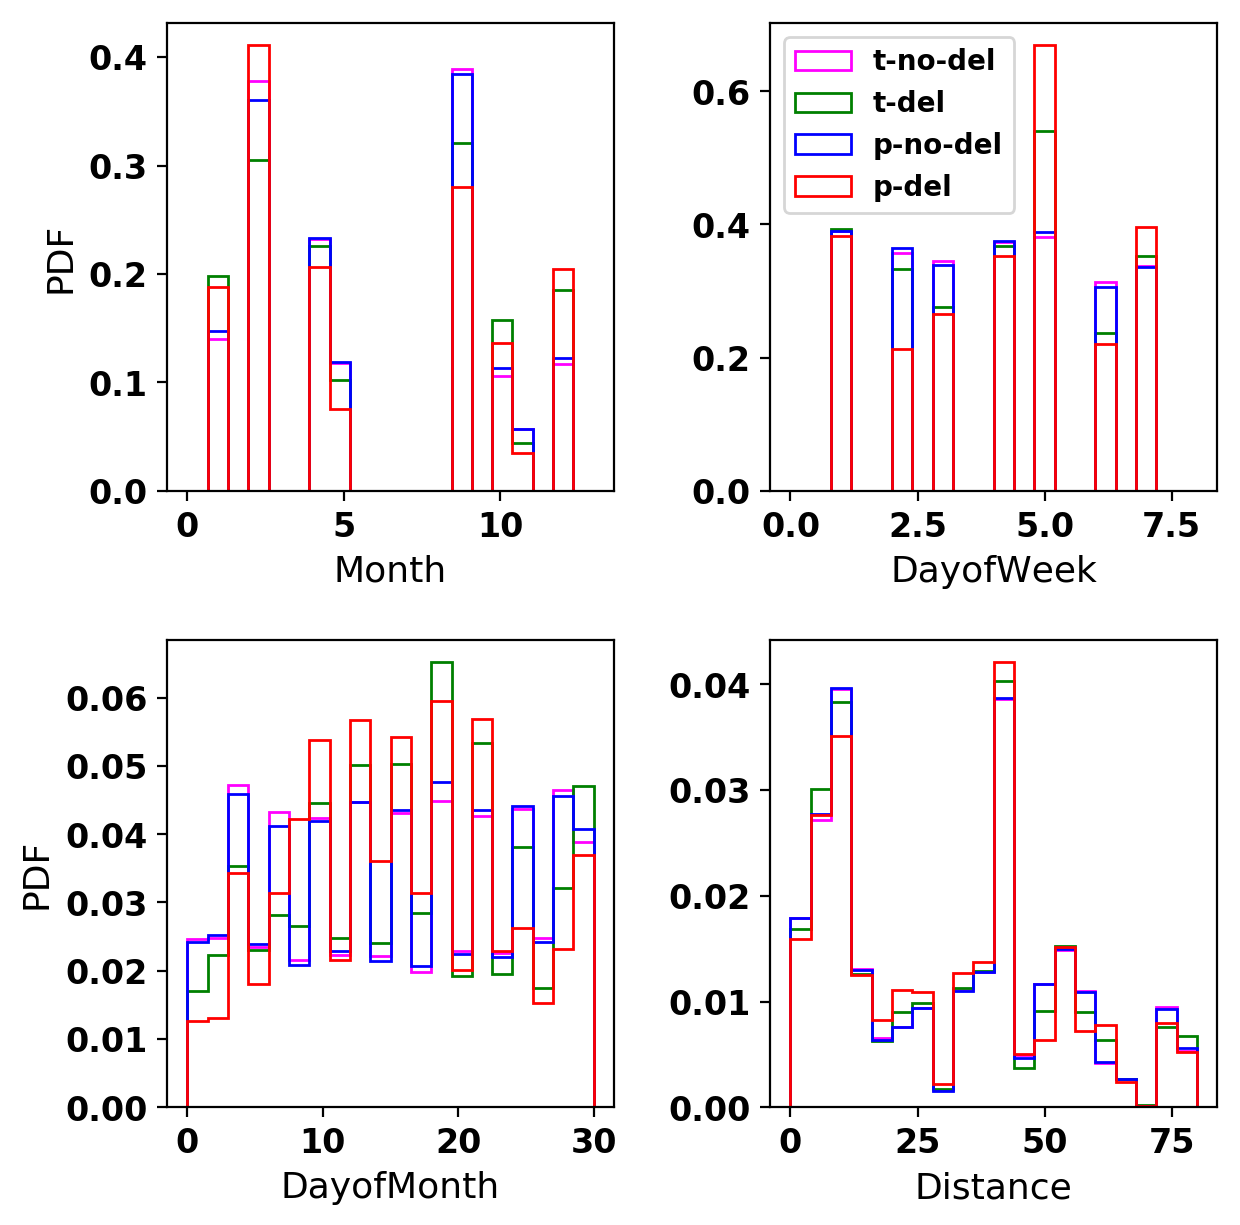

In [418]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 13}	
plt.rc('font', **font)

plt.axhline(linewidth=8) 
plt.axvline(linewidth=8) 

width = 6.487
height = width / 1.018

plt.close('all')
#Plotting Mean Departure delay over a Day
fig, axarr = plt.subplots(2,2, figsize=(6,6), dpi=200,  sharex=False, sharey=False)
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)
colors = ['red', 'blue', 'green', 'magenta']
labels = ['p-del', 'p-no-del', 't-del', 't-no-del']

axarr[0,0].hist([X_pred_l.iloc[:,0],X_pred_nl.iloc[:,0], X_test_l.iloc[:,0],X_test_nl.iloc[:,0]], 
                color=colors,label=labels,bins=20, range=[0,13], histtype="step", normed=True)
# axarr[0,0].set_xlim(0, 13)
# axarr[0,0].set_ylim(0, 0.25)
axarr[0,0].set_xlabel('Month')
axarr[0,0].set_ylabel('PDF')


axarr[0,1].hist([X_pred_l.iloc[:,1],X_pred_nl.iloc[:,1], X_test_l.iloc[:,1],X_test_nl.iloc[:,1]], color=colors, 
           label=labels,bins=20, range=[0,8], histtype="step", normed=True)
axarr[0,1].legend(prop={'size': 10}, loc=2)
# axarr[0,1].set_xlim(0, 8)
# axarr[0,1].set_ylim(0, 0.5)
axarr[0,1].set_xlabel('DayofWeek')


axarr[1,0].hist([X_pred_l.iloc[:,2],X_pred_nl.iloc[:,2], X_test_l.iloc[:,2],X_test_nl.iloc[:,2]], color=colors, 
           label=labels,bins=20, range=[0,30], histtype="step", normed=True)
# axarr[1,0].set_xlim(0, 31)
# axarr[1,0].set_ylim(0, 0.06)
axarr[1,0].set_xlabel('DayofMonth')
axarr[1,0].set_ylabel('PDF')

axarr[1,1].hist([X_pred_l.iloc[:,4],X_pred_nl.iloc[:,4], X_test_l.iloc[:,4],X_test_nl.iloc[:,4]], color=colors, 
           label=labels,bins=20, histtype="step", normed=True)
axarr[1,1].set_xlabel('Distance')

plt.tight_layout()
fig.set_size_inches(width, height)
fig.savefig("/Users/wildanabdussalam/Documents/Code/datascience/distri_pred.png",
           bbox_inches="tight", dpi=200)
plt.show()
plt.clf()

Comparing methods : Random Forest, Logistic regression, Decision tree Classifiers and Neural networks

In [479]:
clf.score(X_test, Y_test) #Random Forest

0.7964652111653818

In [480]:
clf1 = LogisticRegression()

In [481]:
clf1.fit(X_train, Y_train) #Logistic regression
clf1.score(X_test, Y_test)

0.8163557543302145

In [482]:
clf2 = DecisionTreeClassifier()

In [483]:
clf2.fit(X_train, Y_train) #Decision Tree Classifier
clf2.score(X_test, Y_test)

0.678161595951274

In [442]:
clf3 = clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

In [443]:
clf3.fit(X_train, Y_train) #Neural networks
clf3.score(X_test, Y_test)

0.8147446187170015

As random forest shows the most precise prediction, we improve its performance by a grid search method.

In [419]:
#In order to reduce deviation a grid search is performed. 
from sklearn.grid_search import GridSearchCV

parameter_grid = [{'n_estimators':[50, 100, 200], 'max_depth' : [5, 10, 20], 'min_samples_leaf' :[1, 2, 3, 4, 5, 10, 20]
                  }]

#begin the grid search
clf = GridSearchCV(RandomForestClassifier(bootstrap=True, class_weight="balanced_subsample", criterion='gini',
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
                   parameter_grid,refit=True, cv=3,scoring='roc_auc')

In [421]:
%time clf.fit(X_train, Y_train)
# Print out the results
print("Best parameters:")
print(" ")
print(clf.best_params_)
print(" ")
print("Grid scores:")
print(" ")
for params, mean_score, scores in clf.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r" %(mean_score, scores.std()*2, params))

# Retrieve best random forest model from grid search
rf2 = clf.best_estimator_
print("\nBest estimator:\n%s" %rf2)

CPU times: user 38min 44s, sys: 55.8 s, total: 39min 39s
Wall time: 14min 2s
Best parameters:
 
{'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 200}
 
Grid scores:
 
0.664 (+/-0.036) for {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 50}
0.666 (+/-0.037) for {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 100}
0.667 (+/-0.041) for {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 200}
0.665 (+/-0.035) for {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 50}
0.666 (+/-0.037) for {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 100}
0.667 (+/-0.042) for {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 200}
0.665 (+/-0.039) for {'max_depth': 5, 'min_samples_leaf': 3, 'n_estimators': 50}
0.666 (+/-0.039) for {'max_depth': 5, 'min_samples_leaf': 3, 'n_estimators': 100}
0.667 (+/-0.042) for {'max_depth': 5, 'min_samples_leaf': 3, 'n_estimators': 200}
0.664 (+/-0.039) for {'max_depth': 5, 'min_samples_leaf': 4, 'n_estimators': 50}
0.666 (+/

In [422]:
clf.score(X_test, Y_test) #Random Forest improved -> is not improved so stick the previous value.

0.7934001723211861

In [492]:
discr = {}
bin_ujung = np.linspace(min(X_pred_l['Month']), max(X_pred_l['Month']), 20)
p1, bin_ujung1 = np.histogram(X_pred_l.Month, bins=bin_ujung, density=False)
p2, bin_ujung2 = np.histogram(X_pred_nl.Month, bins=bin_ujung, density=False)
discr["Month"] = min_discrepancy(p1,p2)
bin_ujung = np.linspace(min(X_pred_l['DayofMonth']), max(X_pred_l['DayofMonth']), 20)
p1, bin_ujung1 = np.histogram(X_pred_l.DayofMonth, bins=bin_ujung, density=False)
p2, bin_ujung2 = np.histogram(X_pred_nl.DayofMonth, bins=bin_ujung, density=False)
discr["DayofMonth"] = min_discrepancy(p1,p2)
bin_ujung = np.linspace(min(X_pred_l['DayofWeek']), max(X_pred_l['DayofWeek']), 20)
p1, bin_ujung1 = np.histogram(X_pred_l.DayofWeek, bins=bin_ujung, density=False)
p2, bin_ujung2 = np.histogram(X_pred_nl.DayofWeek, bins=bin_ujung, density=False)
discr["DayofWeek"] = min_discrepancy(p1,p2)
bin_ujung = np.linspace(min(X_pred_l['Carrier']), max(X_pred_l['Carrier']), 20)
p1, bin_ujung1 = np.histogram(X_pred_l.Carrier, bins=bin_ujung, density=False)
p2, bin_ujung2 = np.histogram(X_pred_nl.Carrier, bins=bin_ujung, density=False)
discr["Carrier"] = min_discrepancy(p1,p2)
bin_ujung = np.linspace(min(X_pred_l['Dest']), max(X_pred_l['Dest']), 20)
p1, bin_ujung1 = np.histogram(X_pred_l.Dest, bins=bin_ujung, density=False)
p2, bin_ujung2 = np.histogram(X_pred_nl.Dest, bins=bin_ujung, density=False)
discr["Dest"] = min_discrepancy(p1,p2)
bin_ujung = np.linspace(min(X_pred_l['DepTime']), max(X_pred_l['DepTime']), 20)
p1, bin_ujung1 = np.histogram(X_pred_l.DepTime, bins=bin_ujung, density=False)
p2, bin_ujung2 = np.histogram(X_pred_nl.DepTime, bins=bin_ujung, density=False)
discr["DepTime"] = min_discrepancy(p1,p2)
bin_ujung = np.linspace(min(X_pred_l['TaxiOut']), max(X_pred_l['TaxiOut']), 20)
p1, bin_ujung1 = np.histogram(X_pred_l.TaxiOut, bins=bin_ujung, density=False)
p2, bin_ujung2 = np.histogram(X_pred_nl.TaxiOut, bins=bin_ujung, density=False)
discr["TaxiOut"] = min_discrepancy(p1,p2)
bin_ujung = np.linspace(min(X_pred_l['Distance']), max(X_pred_l['Distance']), 20)
p1, bin_ujung1 = np.histogram(X_pred_l.Distance, bins=bin_ujung, density=False)
p2, bin_ujung2 = np.histogram(X_pred_nl.Distance, bins=bin_ujung, density=False)
discr["Distance"] = min_discrepancy(p1,p2)


# Now do the dummy variables, starting at column 7 to skip the 6 columns we already did, 
# plus the response column "dep_delayed_15min".
bin_ujungs   = np.linspace(-0.5, 1.5, 3)
for ngaran in list(delay_maskapai_filt_pd_onan.columns.values)[:-1]:
    p1,bin_ujungs1 = np.histogram(X_pred_l[ngaran], bins=bin_ujungs, density=False)
    p2,bin_ujungs2 = np.histogram(X_pred_nl[ngaran], bins=bin_ujungs, density=False)
    discr[ngaran] = min_discrepancy(p1, p2)
    
list_lal  = Counter(discr).most_common()
ndisplay = 10
print('%i intrinsic discrepancies between delay and no-delay, in decreasing order: ' %ndisplay)
for feature in list_lal[:ndisplay]:
    print('   %.6e  (%s)' % (feature[1],feature[0]))

10 intrinsic discrepancies between delay and no-delay, in decreasing order: 
   1.017827e-01  (DepTime)
   2.940339e-02  (Carrier)
   7.990665e-03  (Dest)
   0.000000e+00  (Month)
   0.000000e+00  (DayofMonth)
   0.000000e+00  (DayofWeek)
   0.000000e+00  (TaxiOut)
   0.000000e+00  (Distance)


In [485]:
X_pred_l.head(10)

,Month,DayofWeek,DayofMonth,Carrier,Dest,DepTime,TaxiOut,Distance,ypred,ytest
120764,10,6,22,9,38,917,11.0,447.0,1.0,0.0
120776,10,7,23,9,4,126,14.0,967.0,1.0,0.0
120790,10,7,23,9,43,794,17.0,337.0,1.0,1.0
120805,10,7,23,9,38,1044,18.0,447.0,1.0,1.0
120815,10,7,23,9,35,479,14.0,372.0,1.0,0.0
120824,10,2,25,9,4,377,23.0,967.0,1.0,1.0
120880,10,3,26,9,7,1105,14.0,414.0,1.0,0.0
120885,10,3,26,9,43,965,19.0,337.0,1.0,0.0
120898,10,3,26,9,8,700,10.0,651.0,1.0,0.0
120931,10,4,27,9,7,507,10.0,414.0,1.0,1.0
